### Imports


In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing, metrics, tree
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [226]:
train = pd.read_csv('data\wage_train.csv', sep=",")
test = pd.read_csv('data\wage_test.csv', sep=",")

Não há valores nulos!!!

In [227]:
test.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [228]:
train.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

In [229]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [230]:
train.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Removing 'Unnamed' column from both datasets

In [231]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [232]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education_num   16280 non-null  int64 
 5   marital_status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital_gain    16280 non-null  int64 
 11  capital_loss    16280 non-null  int64 
 12  hours_per_week  16280 non-null  int64 
 13  native_country  16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


PS: Valores normalizados


<AxesSubplot:ylabel='yearly_wage'>

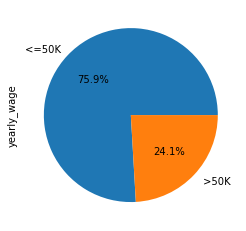

In [233]:
print('PS: Valores normalizados')
train.yearly_wage.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

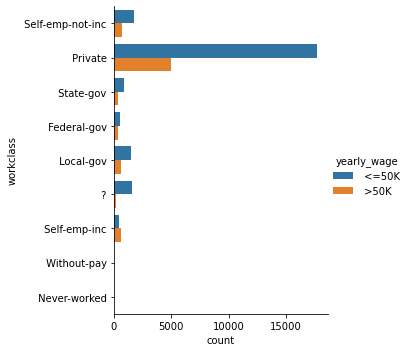

In [234]:
sns.catplot(y="workclass", hue="yearly_wage", kind="count", data=train)

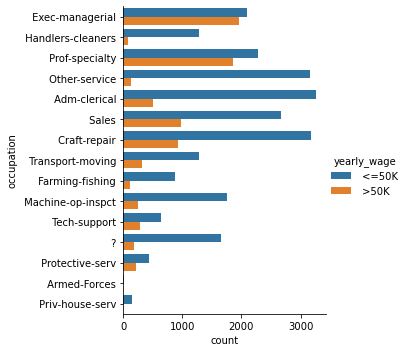

In [235]:
sns.catplot(y="occupation", hue="yearly_wage", kind="count", data=train)

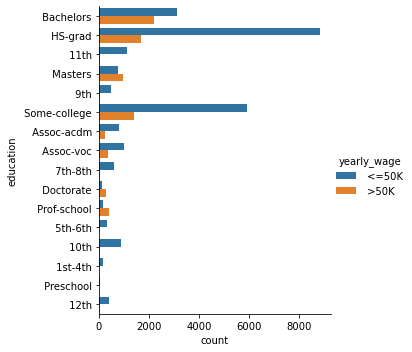

In [236]:
sns.catplot(y="education", hue="yearly_wage", kind="count", data=train)

	Race percentages
 White                 85.4
 Black                  9.6
 Asian-Pac-Islander     3.2
 Amer-Indian-Eskimo     1.0
 Other                  0.8
Name: race, dtype: float64


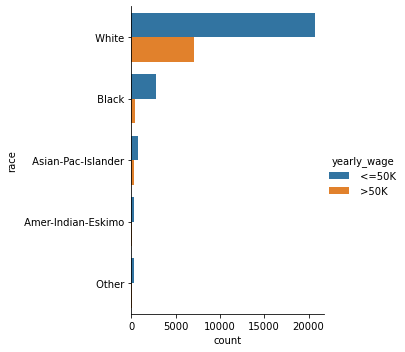

In [237]:
print("\tRace percentages")
print(round(train.race.value_counts()/train.race.size*100,1))
sns.catplot(y="race", hue="yearly_wage", kind="count", data=train)

	Sex percentages
 Male      66.9
 Female    33.1
Name: sex, dtype: float64


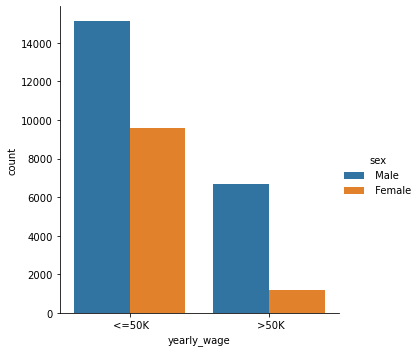

In [238]:
print("\tSex percentages")
print(round(train.sex.value_counts()/train.sex.size*100,1))
sns.catplot(x="yearly_wage", hue="sex", kind="count", data=train)

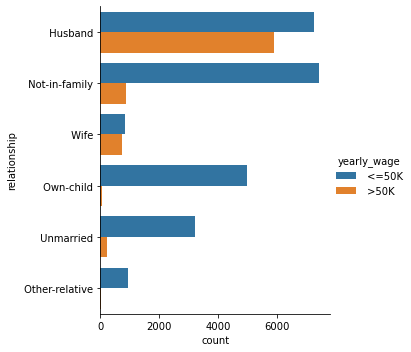

In [239]:
sns.catplot(y="relationship", hue="yearly_wage", kind="count", data=train)

<AxesSubplot:xlabel='age', ylabel='Count'>

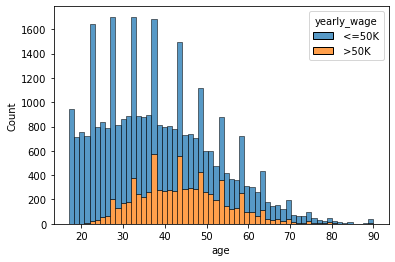

In [240]:
sns.histplot(data=train, x="age", hue="yearly_wage", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='relationship'>

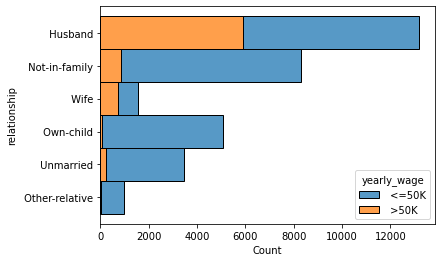

In [241]:
sns.histplot(data=train, y="relationship", hue="yearly_wage", multiple="stack")

In [242]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In order to be able to predict a feature, it is necessary to convert 'categorical' data into 'numerical'

In [243]:
num_wage_train = train.apply(preprocessing.LabelEncoder().fit_transform)
num_wage_test = test.apply(preprocessing.LabelEncoder().fit_transform)

In [244]:
num_wage_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [245]:
num_wage_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,21,4,1888,11,8,2,5,0,4,1,0,0,49,38
1,11,2,11539,7,11,2,11,0,4,1,0,0,39,38
2,27,4,5146,15,9,2,7,0,2,1,90,0,39,38
3,1,0,2450,15,9,4,0,3,4,0,0,0,29,38
4,17,4,7627,0,5,4,8,1,4,1,0,0,29,38


Normalize data:

In [246]:
wage_train_array = MinMaxScaler().fit_transform(num_wage_train)
norm_wage_train = pd.DataFrame(wage_train_array, columns=num_wage_train.columns)
norm_wage_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.299727,0.483600,0.484997,0.686550,0.605373,0.435299,0.469494,0.289275,0.916462,0.669195,0.055090,0.022564,0.423419,0.895580,0.240817
std,0.189385,0.181985,0.279439,0.258021,0.171514,0.251038,0.302058,0.321359,0.212204,0.470510,0.197461,0.110513,0.130583,0.190827,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152778,0.500000,0.249272,0.600000,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.419355,0.951220,0.000000
50%,0.277778,0.500000,0.478033,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.419355,0.951220,0.000000
75%,0.430556,0.500000,0.715432,0.800000,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.473118,0.951220,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
wage_test_array = MinMaxScaler().fit_transform(num_wage_test)
norm_wage_test = pd.DataFrame(wage_test_array, columns=num_wage_test.columns)
norm_wage_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,0.302321,0.484191,0.490908,0.684627,0.604873,0.438749,0.470542,0.287408,0.918136,0.667015,0.053371,0.023536,0.446958,0.896405
std,0.192291,0.185091,0.284349,0.258828,0.171167,0.251770,0.302432,0.318581,0.210063,0.471296,0.194779,0.115398,0.139154,0.187131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152778,0.500000,0.247614,0.600000,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.443182,0.950000
50%,0.277778,0.500000,0.486469,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.443182,0.950000
75%,0.430556,0.500000,0.731169,0.800000,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.500000,0.950000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using train.test.split (for training purposes and method evaluation first):

In [248]:
training_set, test_set = train_test_split(norm_wage_train, test_size = 0.33, random_state = 1)
X_train = training_set.iloc[:,0:14].values
Y_train = training_set.iloc[:,14].values
X_test = test_set.iloc[:,0:14].values
Y_test = test_set.iloc[:,14].values

K-Nearest Neighbour Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      8174
         1.0       0.66      0.61      0.63      2571

    accuracy                           0.83     10745
   macro avg       0.77      0.75      0.76     10745
weighted avg       0.83      0.83      0.83     10745

K-Nearest Neighbour Classifier matrix:


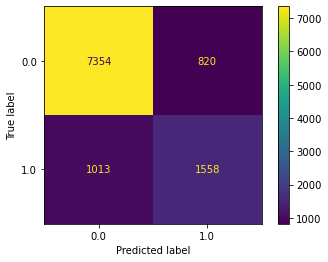

In [249]:
# KNeighborsClassifier
method = KNeighborsClassifier()
fit = method.fit(X_train,Y_train)
Y_pred = method.predict(X_test)

print('K-Nearest Neighbour Classifier metrics:')
print(metrics.classification_report(Y_test, Y_pred))

print('K-Nearest Neighbour Classifier matrix:')
plot_confusion_matrix(fit, X_test, Y_test)
plt.show()

Support Vector Machine metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      8174
         1.0       0.74      0.54      0.62      2571

    accuracy                           0.84     10745
   macro avg       0.80      0.74      0.76     10745
weighted avg       0.84      0.84      0.84     10745

Support Vector Machine matrix:


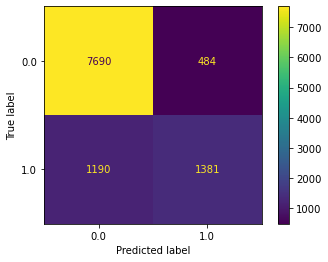

In [250]:
# Support Vector Machine
method = SVC()
fit = method.fit(X_train,Y_train)
Y_pred = method.predict(X_test)

print('Support Vector Machine metrics:')
print(metrics.classification_report(Y_test, Y_pred))

print('Support Vector Machine matrix:')
plot_confusion_matrix(fit, X_test, Y_test)
plt.show()

LogisticRegression metrics:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      8174
         1.0       0.71      0.45      0.55      2571

    accuracy                           0.82     10745
   macro avg       0.78      0.69      0.72     10745
weighted avg       0.81      0.82      0.81     10745

LogisticRegression Confusion matrix:


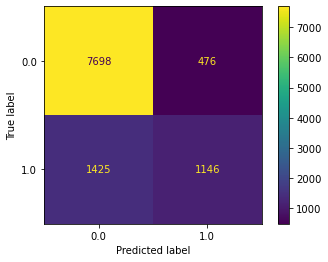

In [251]:
# LogisticRegression
method = LogisticRegression()
fit = method.fit(X_train,Y_train)
Y_pred = method.predict(X_test)

print('LogisticRegression metrics:')
print(metrics.classification_report(Y_test, Y_pred))

print('LogisticRegression Confusion matrix:')
plot_confusion_matrix(fit, X_test, Y_test)
plt.show()

Random Forest Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      8174
         1.0       0.74      0.61      0.67      2571

    accuracy                           0.86     10745
   macro avg       0.81      0.77      0.79     10745
weighted avg       0.85      0.86      0.85     10745

Random Forest Classifier Confusion matrix:


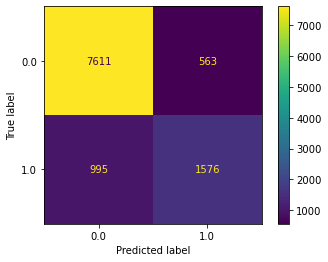

In [252]:
# RandomForestClassifier
method = RandomForestClassifier()
fit = method.fit(X_train,Y_train)
Y_pred = method.predict(X_test)

print('Random Forest Classifier metrics:')
print(metrics.classification_report(Y_test, Y_pred))

print('Random Forest Classifier Confusion matrix:')
plot_confusion_matrix(fit, X_test, Y_test)
plt.show()

DecisionTreeClassifier metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      8174
         1.0       0.58      0.61      0.60      2571

    accuracy                           0.80     10745
   macro avg       0.73      0.74      0.73     10745
weighted avg       0.81      0.80      0.80     10745

DecisionTreeClassifier Confusion matrix:


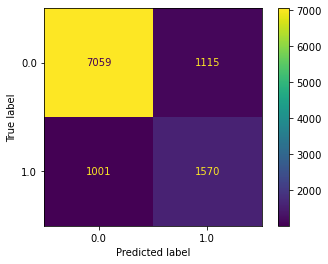

In [253]:
# Decision Tree Classifier
method = tree.DecisionTreeClassifier()
fit = method.fit(X_train,Y_train)
Y_pred = method.predict(X_test)

print('DecisionTreeClassifier metrics:')
print(metrics.classification_report(Y_test, Y_pred))

print('DecisionTreeClassifier Confusion matrix:')
plot_confusion_matrix(fit, X_test, Y_test)
plt.show()

In [254]:
method = RandomForestClassifier()
method.fit(X_train,Y_train)
prediction = method.predict(norm_wage_test)

In [255]:
results = pd.DataFrame(prediction, columns = ['predictedValues'])
mapping = {0:'<=50K',1:'>50K'}
results['predictedValues'].replace(mapping, inplace=True)
results.insert(loc=0, column='rowNumber', value=np.arange(len(results)))
results.to_csv('predicted.csv', index=False)